# <span style="color:green"> CHAPTER 9 Combining Pandas Objects </span>

A wide variety of options are available to combine two or more DataFrames or Series together. 

> ```The ***append method*** is the least flexible and only allows for new rows to be appended to a DataFrame.``` 

> ```The ***concat method*** is very versatile and can combine any number of DataFrames or Series on either axis.``` 

> ```The ***join method*** provides fast lookups by aligning a column of one DataFrame to the index of others.```

> ```The ***merge method*** provides SQL-like capabilities to join two DataFrames together```

## Appending new rows to DataFrames

In [20]:
url = "https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/names.csv"
names = pd.read_csv(url)
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2


In [6]:
# we create the new row and join it with .loc
new_data_list = ['Aria', 1]
names.loc[4] = new_data_list
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1


In [7]:
#because loc is used with columns names, we don't really have to use numbers
names.loc['five'] = ['Zach', 3]
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3


In [9]:
# To be more explicit in associating variables to values, you may use a dictionary
names.loc[len(names)] = {'Name': 'Zayd', 'Age': '2'} #len(names) give the space where it can go
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3
6,Zayd,2
7,Zayd,2


In [18]:
#A Series can hold the new data as well and works exactly the same as a dictionary
names.loc[len(names)] = pd.Series({'Age':32,'Name':'Dean'})

The preceding operations all use the .loc indexing operator to make changes to the names DataFrame in-place. 

There is no separate copy of the DataFrame that is returned. In the next few steps, we will look at the append method, which does not modify the calling DataFrame. 

Instead, it returns a new copy of the DataFrame with the appended row(s).

In [ ]:
url = "https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/names.csv"
names = pd.read_csv(url)
names

In [22]:
#names.append({'Name':'Aria', 'Age':'1'}) #pero esto da error, hay que agregar el parametro = ignore_index
names.append({'Name':'Aria', 'Age':'1'}, ignore_index= True)

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1


This works but ignore_index is a sneaky parameter. When set to True, the old index will be removed completely and replaced with a RangeIndex from 0 to n-1 (or any values we pass). For instance, let's specify an index for the names DataFrame:

In [24]:
names.index = ['Canada', 'Canada', 'USA', 'USA']
names

,Name,Age
Canada,Cornelia,70
Canada,Abbas,69
USA,Penelope,4
USA,Niko,2


In [25]:
#if we run this code again, then it gives this error. It gets rid of the index we already had
names.append({'Name':'Aria', 'Age':'1'}, ignore_index= True)

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1


In [27]:
#we can change the index wich is used
names.index = ['Canada', 'Canada', 'USA', 'USA']
s = pd.Series({'Name': 'Zach', 'Age': 3}, name = len(names))
names.append(s)

,Name,Age
Canada,Cornelia,70
Canada,Abbas,69
USA,Penelope,4
USA,Niko,2
4,Zach,3


## Concatenating multiple DataFrames together

In [29]:
url2016 = "https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/stocks_2016.csv"
url2017 = "https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/stocks_2017.csv"
stoncks_16 = pd.read_csv(url2016, index_col='Symbol')
stoncks_17 = pd.read_csv(url2017, index_col='Symbol')

In [32]:
stoncks_16

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70


In [33]:
stoncks_17

,Shares,Low,High
Symbol,,,
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


In [35]:
# Place all the stock datasets into a single list, and then call the concat function to
# concatenate them together:
s_list = [stoncks_16, stoncks_17]
pd.concat(s_list)

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


In [36]:
#Pero aqui no sabemos de que anio vienen los datos. We can fix this with the ***keys*** parameter
#Nontheless...that creates a MultiIndex
pd.concat(s_list, keys= ['2016', '2017'], names=['Years', 'Symbol'])

Shares  Low  High
Years Symbol                   
2016  AAPL        80   95   110
      TSLA        50   80   130
      WMT         40   55    70
2017  AAPL        50  120   140
      GE         100   30    40
      IBM         87   75    95
      SLB         20   55    85
      TXN        500   15    23
      TSLA       100  100   300

In [38]:
#We can also do the last part on an horizontal way
pd.concat(s_list, keys= ['2016','2017'], axis = 'columns', names= ['years', None])#or 'Symbols' instead of None

years   2016                2017              
      Shares   Low   High Shares    Low   High
AAPL    80.0  95.0  110.0   50.0  120.0  140.0
TSLA    50.0  80.0  130.0  100.0  100.0  300.0
WMT     40.0  55.0   70.0    NaN    NaN    NaN
GE       NaN   NaN    NaN  100.0   30.0   40.0
IBM      NaN   NaN    NaN   87.0   75.0   95.0
SLB      NaN   NaN    NaN   20.0   55.0   85.0
TXN      NaN   NaN    NaN  500.0   15.0   23.0

In [39]:
#But!! we have NaN values. This is due to the fact that concatenate does an outer join. (gets all the values and
#makes them in a table trying to match everything). We can switch to a inner join with the parameter ***join***

pd.concat(s_list, join='inner', keys=['2016', '2017'], axis = 'columns', names=['Year', None]) #only the intersection

Year     2016            2017          
       Shares Low High Shares  Low High
Symbol                                 
AAPL       80  95  110     50  120  140
TSLA       50  80  130    100  100  300

## Comparing President Trump's and Obama's approval ratings

```In this recipe, we will use the read_html function, which comes heavily equipped to scrape
data from tables online and turn them into DataFrames.``` 

```*********Esto ya no funciona es esta pagina. Ya tienen csvs...**************```

In [1]:
trump = pd.read_csv(r'C:\Users\MSI\Desktop\Kookmin\Second semester\Programming analysis\Pandas Cookbook\trump.csv',
                   parse_dates= ['Start Date', 'End Date'])
obama = pd.read_csv(r'C:\Users\MSI\Desktop\Kookmin\Second semester\Programming analysis\Pandas Cookbook\obama.csv',
                   parse_dates= ['Start Date', 'End Date'])
bush = pd.read_csv(r'C:\Users\MSI\Desktop\Kookmin\Second semester\Programming analysis\Pandas Cookbook\gwbush.csv',
                   parse_dates= ['Start Date', 'End Date'])

In [2]:
trump.head()

,Start Date,End Date,Approving,Disapproving,Unsure/NoData
0,2021-01-04,2021-01-15,34,62,4
1,2020-12-01,2020-12-17,39,57,4
2,2020-11-05,2020-11-19,43,55,2
3,2020-10-16,2020-10-27,46,52,2
4,2020-09-30,2020-10-15,43,55,2


In [5]:
obama.head()

,Start Date,End Date,Approving,Disapproving,Unsure/NoData
0,2017-01-16,2017-01-19,59,37,4
1,2017-01-09,2017-01-15,57,39,4
2,2017-01-02,2017-01-08,55,42,3
3,2016-12-26,2017-01-01,55,40,5
4,2016-12-19,2016-12-25,56,40,4


In [6]:
#cambiarle el nombre al dataframe (no la variable)
trump.name = 'Donald Trump'
obama.name = 'Barack Obama'
bush.name = 'George W. Bush'

In [7]:
trump.head()

,Start Date,End Date,Approving,Disapproving,Unsure/NoData
0,2021-01-04,2021-01-15,34,62,4
1,2020-12-01,2020-12-17,39,57,4
2,2020-11-05,2020-11-19,43,55,2
3,2020-10-16,2020-10-27,46,52,2
4,2020-09-30,2020-10-15,43,55,2


In [123]:
s = [trump, obama, bush]

In [124]:
def presidents(df):
    df['President'] = [df.name for x in range(0, len(df))]
    President = df.pop('President')
    df.insert(0, 'President', President)
    return

In [127]:
presidents(bush)

In [128]:
approvals = pd.concat(s)

In [130]:
approvals

,President,Start Date,End Date,Approving,Disapproving,Unsure/NoData
0,Donald Trump,2021-01-04,2021-01-15,34,62,4
1,Donald Trump,2020-12-01,2020-12-17,39,57,4
2,Donald Trump,2020-11-05,2020-11-19,43,55,2
3,Donald Trump,2020-10-16,2020-10-27,46,52,2
4,Donald Trump,2020-09-30,2020-10-15,43,55,2
...,...,...,...,...,...,...
277,George W. Bush,2001-03-09,2001-03-11,58,29,13
278,George W. Bush,2001-03-05,2001-03-07,63,22,15
279,George W. Bush,2001-02-19,2001-02-21,62,21,17
280,George W. Bush,2001-02-09,2001-02-11,57,25,18


In [131]:
approvals.groupby('President', sort= False).median().round(2)

,Approving,Disapproving,Unsure/NoData
President,,,
Donald Trump,40.0,55.0,5.0
Barack Obama,47.0,46.0,7.0
George W. Bush,50.5,46.0,4.0


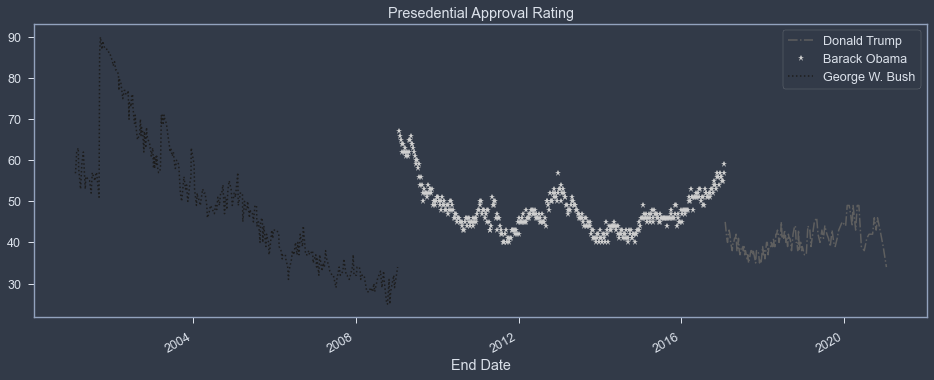

In [134]:
from matplotlib import cm
fig, ax = plt.subplots(figsize=(16,6))

styles = ['-.', '*', ':']
colors = [.7, .3, .9]
groups = approvals.groupby('President', sort=False)

for style, color, (pres, df) in zip(styles, colors, groups):
    df.plot('End Date', 'Approving', ax=ax, label=pres, style=style, color=cm.Greys(color),
        title='Presedential Approval Rating')

## Understanding the differences between concat, join, and merge

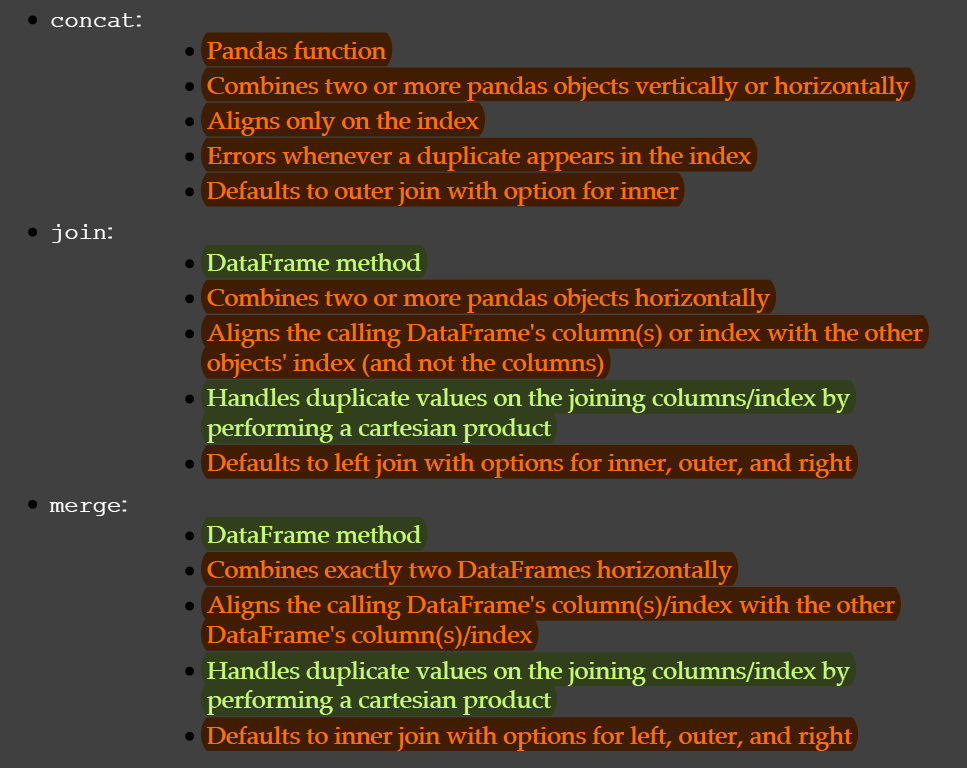

```Jupyter notebooks currently only allow a single DataFrame to be displayed on one line.``` 

```However,there is a way to customize the HTML output with help from the IPython library.```

```The user-defined **display_frames** function accepts a list of DataFrames and outputs them all in a single row```

In [8]:
from IPython.display import display_html

In [12]:
years = 2016, 2017, 2018

stock_tables = [pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/stocks_{}.csv'.format(year),
                           index_col='Symbol')
               for year in years]

In [10]:
#display all the tables in the same space
def display_frames(frames, num_spaces=0):
    t_style = '<table style="display: inline;"'
    tables_html = [df.to_html().replace('<table', t_style)
                   for df in frames]
    space = '&nbsp;' * num_spaces
    display_html(space.join(tables_html), raw=True)

In [11]:
display_frames(stock_tables, 30)
stocks_2016, stocks_2017, stocks_2018 = stock_tables

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70
,Shares,Low,High
Symbol,,,
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85


In [14]:
#The concat function is the only one able to combine DataFrames vertically.
pd.concat(stock_tables, keys= [2016, 2017, 2018])

Shares  Low  High
     Symbol                   
2016 AAPL        80   95   110
     TSLA        50   80   130
     WMT         40   55    70
2017 AAPL        50  120   140
     GE         100   30    40
     IBM         87   75    95
     SLB         20   55    85
     TXN        500   15    23
     TSLA       100  100   300
2018 AAPL        40  135   170
     AMZN         8  900  1125
     TSLA        50  220   400

In [11]:
#It can also combine DataFrames horizontally by changing the axis parameter to columns:
pd.concat(stock_tables, keys=years, axis = 'columns')

2016                2017                 2018               
     Shares   Low   High Shares    Low   High Shares    Low    High
AAPL   80.0  95.0  110.0   50.0  120.0  140.0   40.0  135.0   170.0
TSLA   50.0  80.0  130.0  100.0  100.0  300.0   50.0  220.0   400.0
WMT    40.0  55.0   70.0    NaN    NaN    NaN    NaN    NaN     NaN
GE      NaN   NaN    NaN  100.0   30.0   40.0    NaN    NaN     NaN
IBM     NaN   NaN    NaN   87.0   75.0   95.0    NaN    NaN     NaN
SLB     NaN   NaN    NaN   20.0   55.0   85.0    NaN    NaN     NaN
TXN     NaN   NaN    NaN  500.0   15.0   23.0    NaN    NaN     NaN
AMZN    NaN   NaN    NaN    NaN    NaN    NaN    8.0  900.0  1125.0

In [12]:
# Now that we have started combining DataFrames horizontally, we can use the
# join and merge methods to replicate this functionality of concat.

stocks_2016.join(stocks_2017, lsuffix='_2016', rsuffix='_2017', how= 'outer')

,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017
Symbol,,,,,,
AAPL,80.0,95.0,110.0,50.0,120.0,140.0
GE,NaN,NaN,NaN,100.0,30.0,40.0
IBM,NaN,NaN,NaN,87.0,75.0,95.0
SLB,NaN,NaN,NaN,20.0,55.0,85.0
TSLA,50.0,80.0,130.0,100.0,100.0,300.0
TXN,NaN,NaN,NaN,500.0,15.0,23.0
WMT,40.0,55.0,70.0,NaN,NaN,NaN


In [18]:
# Now, let's turn to merge that, unlike concat and join, can combine exactly two DataFrames together.
stocks_2016.merge(stocks_2017, left_index=True, right_index=True)

,Shares_x,Low_x,High_x,Shares_y,Low_y,High_y
Symbol,,,,,,
AAPL,80,95,110,50,120,140
TSLA,50,80,130,100,100,300


```Now let's turn our comparison to datasets where we are interested in aligning
together the values of columns and not the index or column labels themselves.```

> ```The merge method is built exactly for this situation.```

In [15]:
names = ['prices', 'transactions']
food_tables = [pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/food_{}.csv'.format(name)) for name in names]
food_price, food_transactions = food_tables

In [16]:
display_frames(food_tables, 30)

,item,store,price,Date
0,pear,A,0.99,2017
1,pear,B,1.99,2017
2,peach,A,2.99,2017
3,peach,B,3.49,2017
4,banana,A,0.39,2017
5,banana,B,0.49,2017
6,steak,A,5.99,2017
7,steak,B,6.99,2017
8,steak,B,4.99,2015
,custid,item,store,quantity


In [18]:
# If we wanted to find the total amount of each transaction, we would need to join
# these tables on the item and store columns:

food_transactions.merge(food_price, on = ['item', 'store'])

,custid,item,store,quantity,price,Date
0,1,pear,A,5,0.99,2017
1,1,banana,A,10,0.39,2017
2,2,steak,B,3,6.99,2017
3,2,steak,B,3,4.99,2015
4,2,steak,B,1,6.99,2017
5,2,steak,B,1,4.99,2015
6,2,pear,B,1,1.99,2017
7,2,peach,B,2,3.49,2017


```The price is now aligned correctly with its corresponding item and store, but
there is a problem. Customer 2 has a total of four steak items.```

```As the steak item appears twice in each table for store B, a Cartesian product takes place between
them, resulting in four rows. Also, notice that the item, coconut, is missing```

In [19]:
food_transactions.merge(food_price.query('Date == 2017'), how= 'left')

,custid,item,store,quantity,price,Date
0,1,pear,A,5,0.99,2017.0
1,1,banana,A,10,0.39,2017.0
2,2,steak,B,3,6.99,2017.0
3,2,pear,B,1,1.99,2017.0
4,2,peach,B,2,3.49,2017.0
5,2,steak,B,1,6.99,2017.0
6,2,coconut,B,4,NaN,NaN


In [30]:
# It is possible to read all files from a particular directory into DataFrames without knowing
# their names. Python provides a few ways to iterate through directories, with the glob
# module being a popular choice.

import glob

df_list= []

for filename in glob.glob(r'C:\Users\MSI\Desktop\Kookmin\Second semester\Programming analysis\Pandas Cookbook\*.csv'):
    df_list.append(pd.read_csv(filename, parse_dates=['Start Date', 'End Date']))
    
gas = pd.concat(df_list) # axis='rows')

In [31]:
gas

,Start Date,End Date,Approving,Disapproving,Unsure/NoData
0,2009-01-09,2009-01-11,34,61,5
1,2008-12-12,2008-12-14,29,67,4
2,2008-12-04,2008-12-07,32,61,7
3,2008-11-13,2008-11-16,29,66,5
4,2008-11-07,2008-11-09,28,68,4
...,...,...,...,...,...
136,2017-02-20,2017-02-26,42,53,5
137,2017-02-13,2017-02-19,40,54,6
138,2017-02-06,2017-02-12,41,53,6
139,2017-01-30,2017-02-05,43,52,5


## Connecting to SQL databases

In order for this recipe to work, you will need to have the sqlalchemy Python package
installed. If you installed the Anaconda distribution, then it should already be available to
you. SQLAlchemy is the preferred pandas tool when making connections to databases.

In [32]:
pip install SQLAlchemy

Note: you may need to restart the kernel to use updated packages.


In [38]:
from sqlalchemy import create_engine
engine = create_engine('mysql://Users/MSI/Desktop/Data Science/MySQL/murach/mysql/diagrams/ap.db')

ModuleNotFoundError: No module named 'MySQLdb'

In [34]:
tracks = pd.read_sql_table('tracks', engine)
tracks.head()

OperationalError: (sqlite3.OperationalError) unable to open database file
(Background on this error at: http://sqlalche.me/e/13/e3q8)